# Plot Dual Doppler Output

In [64]:
import xarray as xr
import matplotlib.pyplot as plt
import pyart
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import numpy as np
from shapely import wkt

In [3]:
def calc_updraft_area(vert_vel, threshold=2):
    """
    Plots vertical profile of updraft area
    """
    
    levels = vert_vel.z.values
    areas = []
    
    for lev in levels:
        
        # Subset for given level
        w_sub = vert_vel.sel(z=lev).values
        
        # Calculate area by summing pixels exceeding threshold and multiply by area (.25 km2)
        areas.append(len(w_sub[np.where(w_sub > threshold)]) * .25)
        
    areas = np.array(areas)
    
    return areas, levels

## 0226 UTC

In [4]:
ds = xr.open_dataset('dual_output/Nov12/new_cleaning/Nov12_0224.nc').squeeze()

In [5]:
w_vals = ds.where((ds.w > 0) & (ds.lat > -31.2) & (ds.lat < -31.13) & (ds.lon > -64.) & (ds.lon < -63.92)).sel(z=slice(5000, 12000)).w
w = ds.where((ds.w > 0) & (ds.lat > -31.2) & (ds.lat < -31.13) & (ds.lon > -64.) & (ds.lon < -63.92)).sel(z=slice(5000, 12000)).w.mean(dim='z').values
w_max = ds.where((ds.w > 0) & (ds.lat > -31.2) & (ds.lat < -31.13) & (ds.lon > -64.) & (ds.lon < -63.92)).sel(z=slice(5000, 12000)).w.max(dim=['x','y'])
ref = ds.sel(z=1500).ZM_composite.values

In [6]:
areas1, levels = calc_updraft_area(w_vals, 2)
wmax1 = w_max

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


NameError: name 'wmax2' is not defined

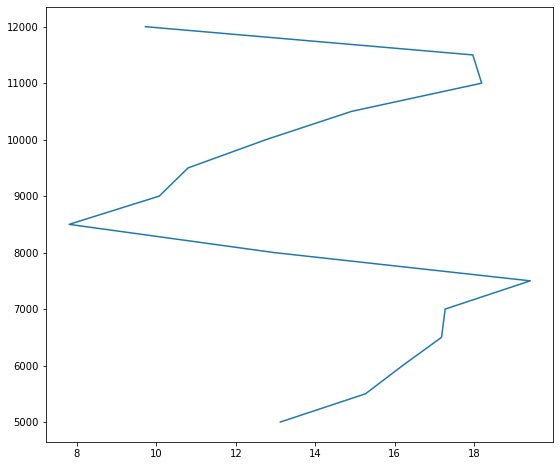

In [7]:
plt.figure(figsize=(20,8))
ax = plt.subplot(121)

ax.plot(wmax1, levels, label='0226 UTC', color='tab:blue')
ax.plot(wmax2, levels, label='0232 UTC', color='tab:orange')
ax.plot(wmax3, levels, label='0236 UTC', color='tab:green')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('$W_{max}$ (m/s)', fontsize=16)
plt.ylabel('Height (km)', fontsize=16)

plt.legend(loc='upper left', fontsize=14)

plt.title('12 November 2018 $w_{max}$ Vertical Profiles', fontsize=18)

ax2 = plt.subplot(122)

ax2.plot(areas1, levels, label='0226 UTC', color='tab:blue')
ax2.plot(areas2, levels, label='0232 UTC', color='tab:orange')
ax2.plot(areas3, levels, label='0236 UTC', color='tab:green')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('$W_{area}$ ($km^2$)', fontsize=16)
plt.ylabel('Height (km)', fontsize=16)

plt.legend(loc='upper left', fontsize=14)

plt.title('12 November 2018 $w_{area}$ Vertical Profiles', fontsize=18)

NameError: name 'wmax2' is not defined

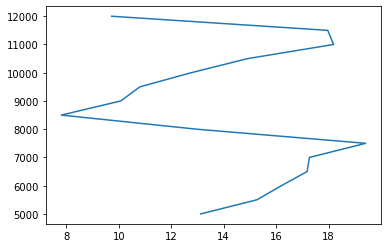

In [7]:
plt.plot(wmax1, levels, label='0226 UTC')
plt.plot(wmax2, levels, label='0232 UTC')
plt.plot(wmax3, levels, label='0236 UTC')

plt.legend()

In [8]:
ds = xr.open_dataset('dual_output/Nov12/new_cleaning/Nov12_0220.nc').squeeze()
df = pd.read_csv('../radar_data_cleaning/Nov_12_2018_0227_0237_OTs.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

lat_min = -31.19
lat_max = -31.13
lon_min = -63.8
lon_max = -63.7

ot_df = geo_df[df.minute == 27]

ota = ot_df.area_polygon.values

ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

ot_df = ot_df.translate(shift_x, shift_y)

lats = ds.lat.values
lons = ds.lon.values

w_vals = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w
w = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
w_max = ds.where((ds.w > 0) & (ds.lat > -31.25) & (ds.lat < -31.2) & (ds.lon > -64.) & (ds.lon < -63.9)).sel(z=slice(5000, 10000)).w.max(dim=['x','y'])
ref = ds.sel(z=3000).ZM_composite.values

area = len(w[np.where(w > 6)]) * .25
areas1, levels = calc_updraft_area(w_vals, 6)
wmax1 = w_max

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0222 UTC')

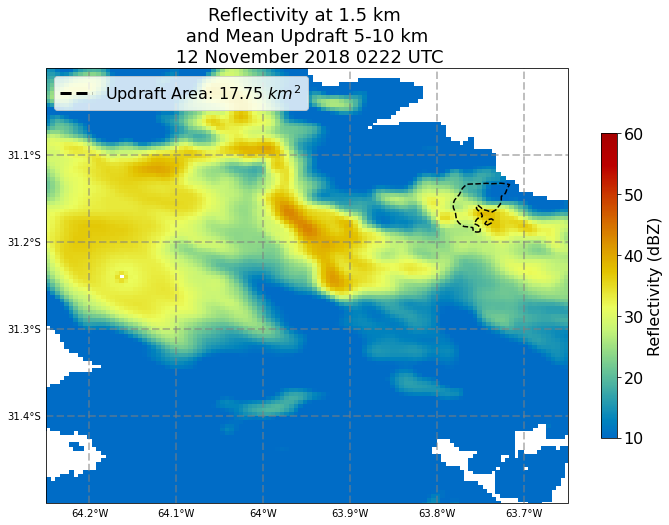

In [15]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=60, cmap='pyart_HomeyerRainbow')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[5, 30], colors=['black'], linestyles='dashed')
#plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

#ot_df.plot(ax=ax, facecolor="none", 
#              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.25, -63.65, -31.5, -31.))

#plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=16)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0222 UTC', fontsize=18)

In [803]:
ds = xr.open_dataset('dual_output/Nov12/new_cleaning/Nov12_0224.nc').squeeze()
df = pd.read_csv('../radar_data_cleaning/Nov_12_2018_0227_0237_OTs.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

lat_min = -31.25
lat_max = -31.16
lon_min = -63.8
lon_max = -63.65

ot_df = geo_df[df.minute == 27]

ota = ot_df.area_polygon.values

ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

ot_df = ot_df.translate(shift_x, shift_y)

lats = ds.lat.values
lons = ds.lon.values

w_vals = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w
w = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
w_max = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.max(dim=['x','y'])
ref = ds.sel(z=3000).ZM_composite.values

area = len(w[np.where(w > 6)]) * .25
areas2, levels = calc_updraft_area(w_vals, 6)
wmax2 = w_max

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0226 UTC')

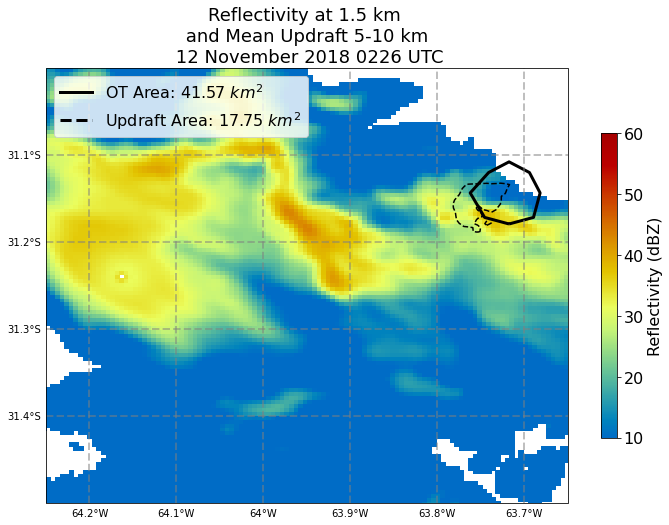

In [16]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=60, cmap='pyart_HomeyerRainbow')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[5, 30], colors=['black'], linestyles='dashed')
#plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.25, -63.65, -31.5, -31.))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=16)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0226 UTC', fontsize=18)

In [44]:
ds = xr.open_dataset('dual_output/Nov12/new_cleaning/Nov12_0230.nc').squeeze()
df = pd.read_csv('../radar_data_cleaning/Nov_12_2018_0227_0237_OTs.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

lat_min = -31.3
lat_max = -31.22
lon_min = -63.8
lon_max = -63.66

ot_df = geo_df[df.minute == 31]

ota = ot_df.area_polygon.values

ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

ot_df = ot_df.translate(shift_x, shift_y)

lats = ds.lat.values
lons = ds.lon.values

w_vals = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w
w = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
w_max = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.max(dim=['x','y'])
ref = ds.sel(z=3000).ZM_composite.values

area = len(w[np.where(w > 6)]) * .25
areas3, levels = calc_updraft_area(w_vals, 6)
wmax3 = w_max

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in greater
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0232 UTC')

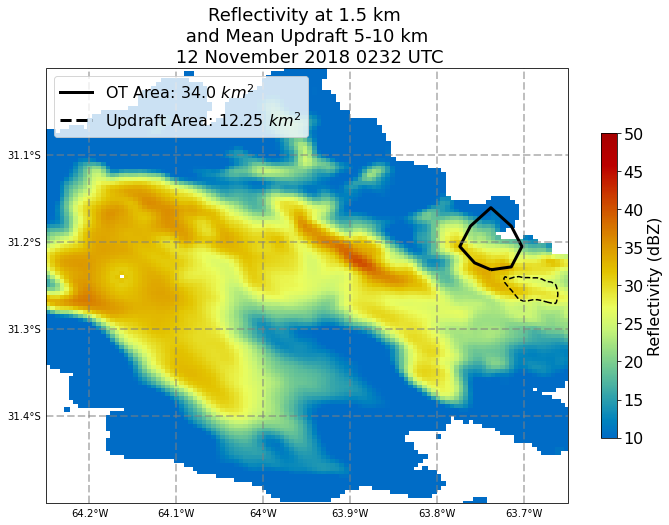

In [45]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_HomeyerRainbow')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[5, 30], colors=['black'], linestyles='dashed')
#plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.25, -63.65, -31.5, -31.))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=16)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0232 UTC', fontsize=18)

NameError: name 'wmax2' is not defined

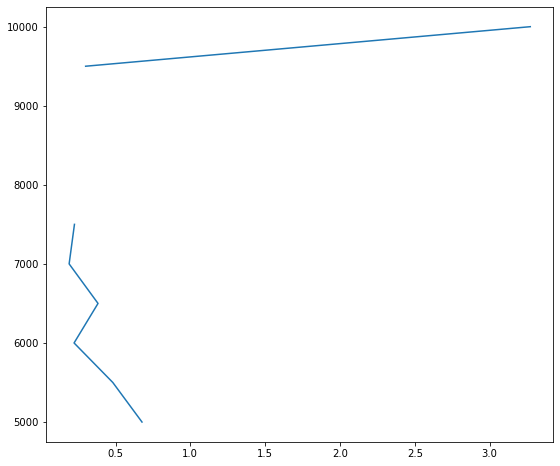

In [19]:
plt.figure(figsize=(20,8))
ax = plt.subplot(121)

ax.plot(wmax1, levels, label='0222 UTC', color='tab:blue')
ax.plot(wmax2, levels, label='0226 UTC', color='tab:orange')
ax.plot(wmax3, levels, label='0232 UTC', color='tab:green')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('$W_{max}$ (m/s)', fontsize=16)
plt.ylabel('Height (km)', fontsize=16)

plt.legend(loc='upper left', fontsize=14)

plt.title('12 November 2018 $w_{max}$ Vertical Profiles', fontsize=18)

ax2 = plt.subplot(122)

ax2.plot(areas1, levels, label='0222 UTC', color='tab:blue')
ax2.plot(areas2, levels, label='0226 UTC', color='tab:orange')
ax2.plot(areas3, levels, label='0232 UTC', color='tab:green')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('$W_{area}$ ($km^2$)', fontsize=16)
plt.ylabel('Height (km)', fontsize=16)

plt.legend(loc='upper left', fontsize=14)

plt.title('12 November 2018 $w_{area}$ Vertical Profiles', fontsize=18)

In [46]:
ds = xr.open_dataset('dual_output/Nov12/new_cleaning/Nov12_0244.nc').squeeze()
#df = pd.read_csv('../radar_data_cleaning/Nov_12_2018_0227_0237_OTs.csv')
df = pd.read_csv('ot_output/Revised_OTs_12_Nov_2018_0232_0243.csv')
df['time'] = pd.to_datetime(df.time)
df['minute'] = df.time.dt.minute
df['geometry'] = df['geometry'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

lat_min = -31.4
lat_max = -31.15
lon_min = -64.3
lon_max = -63.9

ot_df = geo_df[df.minute == 44]

ota = ot_df.area_circle_polygon.values

ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

ot_df = ot_df.translate(shift_x, shift_y)

lats = ds.lat.values
lons = ds.lon.values

w_vals = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 8000)).w
w = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
w_max = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.max(dim=['x','y'])
ref = ds.sel(z=1500).ZM_composite.values

area = len(w[np.where(w > 2)]) * .25

IndexError: index 0 is out of bounds for axis 0 with size 0

In [47]:
np.nanpercentile(w, 70)

2.9094482063830123

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


IndexError: index 0 is out of bounds for axis 0 with size 0

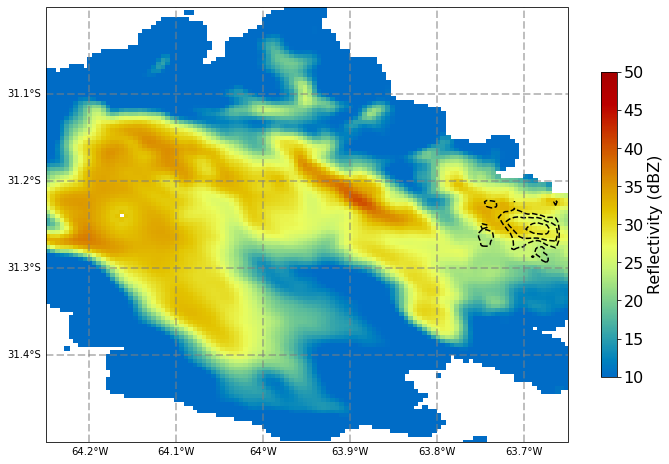

In [48]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_HomeyerRainbow')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[2, 6, 12], colors=['black'], linestyles='dashed')
#plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.25, -63.65, -31.5, -31.))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=16)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0242 UTC', fontsize=18)

---

In [190]:
df = pd.read_csv('ot_output/Revised_OTs_12_Nov_2018_0232_0243.csv', index_col='time', parse_dates=True)

In [191]:
df['ot_depth'] = df.cloudtop_height - df.tropopause_height

from datetime import timedelta
df.index = df.index + timedelta(minutes=1)
df['minute'] = df.index.minute

In [192]:
df['btd'] = df.tropopause_temperature - df.mintb

In [193]:
df.btd

time
2018-11-12 02:32:54.000000000    1.030014
2018-11-12 02:33:54.000000000   -0.869995
2018-11-12 02:34:54.000000000    2.240005
2018-11-12 02:35:54.000000000    3.010010
2018-11-12 02:38:54.000000000   -1.929993
2018-11-12 02:39:54.000000000   -1.179993
2018-11-12 02:40:54.000000000   -0.599991
2018-11-12 02:41:54.000001024   -2.479996
2018-11-12 02:42:54.000000000   -2.000000
2018-11-12 02:43:54.000000000   -1.580002
Name: btd, dtype: float64

In [194]:
df_sub = geo_df[df.minute == 33]
ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]

ot_lon = df_sub.lon.values[0]
ot_lat = df_sub.lat.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/geopandas/geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [195]:
df.lat_corr.values[0]

-33.08235549926758

In [196]:
ds = xr.open_dataset('dual_output/Nov12/man_edited_Nov12_0230.nc').squeeze()
#ds = xr.open_dataset('dual_output/Nov12/new_cleaning/Nov12_0230.nc').squeeze()

In [197]:
from shapely import wkt

df['geometry'] = df['geometry'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

In [198]:
df_sub = geo_df[df.minute == 32]
ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]

In [199]:
ota = ot_df.area_circle_polygon.values

In [200]:
ot_lon = df_sub.lon.values[0]
ot_lat = df_sub.lat.values[0]

In [201]:
ot_df = ot_df.translate(shift_x, shift_y)

In [202]:
lats = ds.lat.values
lons = ds.lon.values

In [203]:
w_vals = ds.where((ds.w > 0) & (ds.lat > -31.25) & (ds.lat < -31.2) & (ds.lon > -64.) & (ds.lon < -63.9)).sel(z=slice(3000, 12000)).w

In [204]:
areas1, levels = calc_updraft_area(w_vals, 2)

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


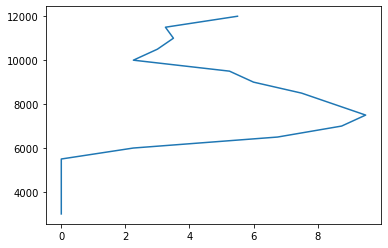

In [205]:
plt.plot(areas1, levels)

In [206]:
# (ds.lat > -31.2) & (ds.lat < -31.13) & (ds.lon > -64.1) & (ds.lon < -63.95)
w_vals = ds.where((ds.w > 0) & (ds.lat > -31.19) & (ds.lat < -31.14) & (ds.lon > -64.) & (ds.lon < -63.915)).sel(z=slice(3000, 12000)).w
w = ds.where((ds.w > 0) & (ds.lat > -31.19) & (ds.lat < -31.14) & (ds.lon > -64.) & (ds.lon < -63.915)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
w_max = ds.where((ds.w > 0) & (ds.lat > -31.25) & (ds.lat < -31.19) & (ds.lon > -64.) & (ds.lon < -63.89)).sel(z=slice(3000, 12000)).w.max(dim=['x','y'])
ref = ds.sel(z=1500).ZM_composite.values

area = len(w[np.where(w > 2)]) * .25
mean_w = np.nanmean(w[np.where(w > 2)])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [207]:
print(mean_w)

3.3403468136993064


In [39]:
max_w = np.nanmax(w_max)
mean_w = np.nanmean(w_max)

max_w2 = np.nanmax(wmax_2)
mean_w2 = np.nanmean(wmax_2)

NameError: name 'wmax_2' is not defined

In [40]:
max_w

14.35641200781719

NameError: name 'wmax_2' is not defined

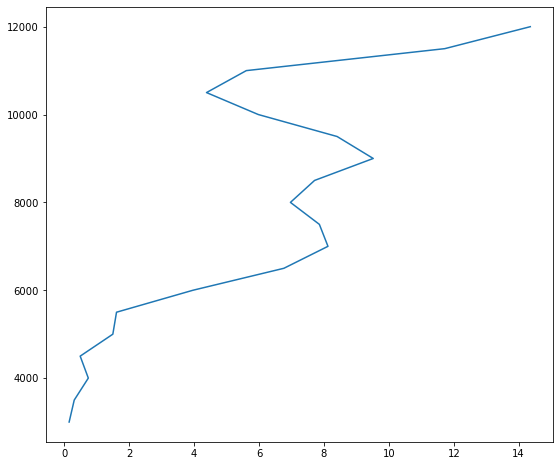

In [142]:
fig = plt.figure(figsize=(20,8))

ax = plt.subplot(121)

ax.plot(w_max.values, w_max.z, label='0232 UTC', color='tab:blue')
#plt.axvline(max_w, label=f'Max w in 5-10 km layer {np.round(max_w, 2)} m/s', linestyle='--', color='tab:blue')
#plt.axvline(mean_w, label=f'Mean w in 5-10 km layer {np.round(mean_w, 2)} m/s', linestyle=':', color='tab:blue')

ax.plot(wmax_2.values, w_max.z, label='0236 UTC', color='tab:orange')
#plt.axvline(max_w2, label=f'Max w in 5-10 km layer {np.round(max_w2, 2)} m/s', linestyle='--', color='tab:orange')
#plt.axvline(mean_w2, label=f'Mean w in 5-10 km layer {np.round(mean_w2, 2)} m/s', linestyle=':', color='tab:orange')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('$W_{max}$ (m/s)', fontsize=16)
plt.ylabel('Height (km)', fontsize=16)

plt.legend(loc='upper left', fontsize=14)

plt.title('12 November 2018 $w_{max}$ Vertical Profiles', fontsize=18)

ax2 = plt.subplot(122)

ax2.plot(areas1, w_max.z, label='0232 UTC', color='tab:blue')
ax2.plot(areas2, w_max.z, label='0236 UTC', color='tab:orange')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('$W_{area}$ ($km^2$)', fontsize=16)
plt.ylabel('Height (km)', fontsize=16)

plt.legend(loc='upper left', fontsize=14)

plt.title('12 November 2018 $w_{area}$ Vertical Profiles', fontsize=18)

plt.suptitle('12 November 2018 Updraft Vertical Profiles', fontsize=24)

plt.savefig('Vertical_w_prof_12_nov.png', dpi=400)

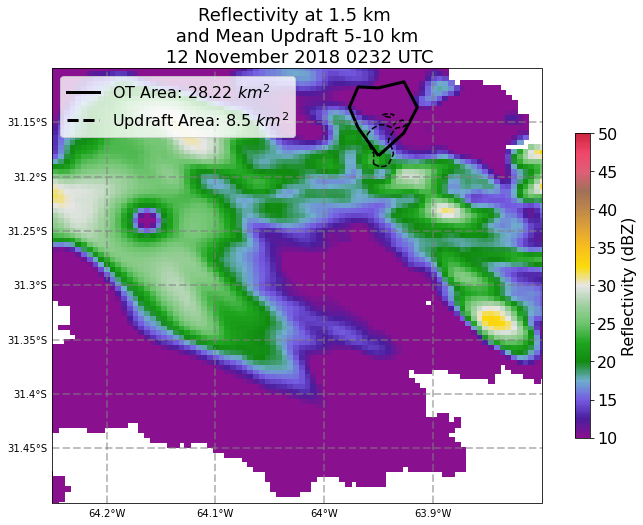

In [208]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[2, 30], colors=['black'], linestyles='dashed')
#plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.25, -63.8, -31.5, -31.1))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=16)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0232 UTC', fontsize=18)

plt.savefig('summary_figs/Nov_12_2018_0230.png', dpi=300)

In [209]:
np.nanpercentile(w, 70)

2.1864180772879176

In [210]:
geo_df = geo_df[(geo_df.minute >= 32) & (geo_df.minute <= 36)]

In [211]:
geo_df['times'] = geo_df.index.strftime('%H%M')
geo_df['times'] = geo_df.times.astype(int)
trop_temps = geo_df.tropopause_temperature.values
trop_height = geo_df.tropopause_height.values

ct_height = geo_df.cloudtop_height.values
ot_temp = geo_df.mintb.values

In [212]:
btd = ot_temp - trop_temps
depth = ct_height - trop_height

In [213]:
nov12_times = np.array([int(232), int(236)])
nov12_ua = [8.5, 11.75,]
nov12_wmax = [9.52, 10.76]

#nov12_ua = [14.5, 10.75,]
nov12_wmax = [9.52, 10.76]

ticks = np.append(geo_df.times, 236)

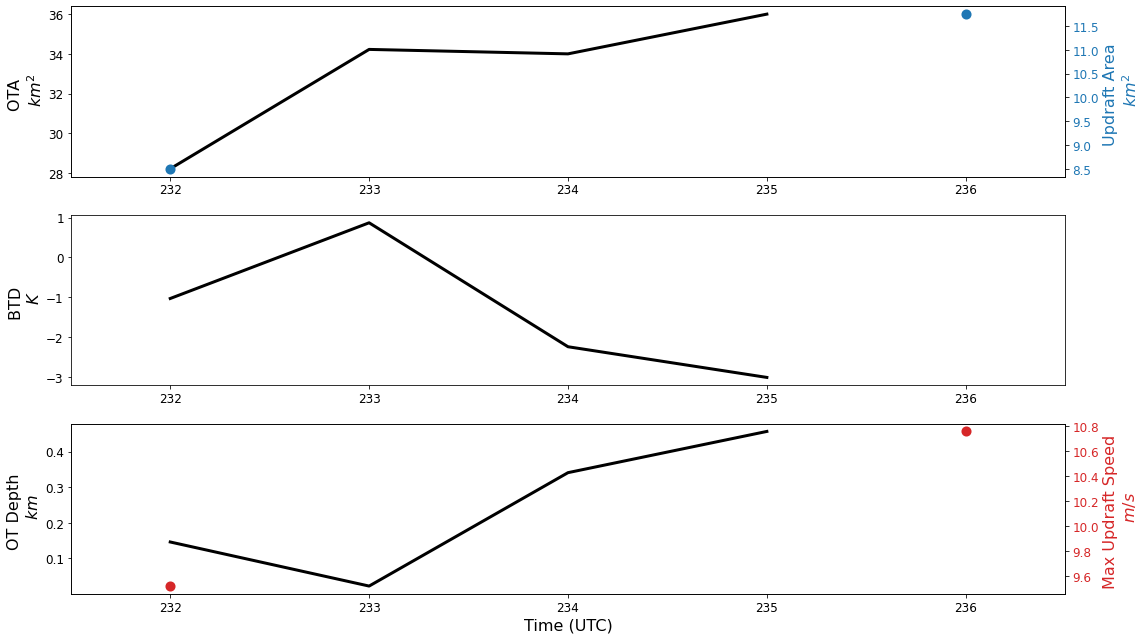

In [214]:
plt.figure(figsize=(16,9))
ax = plt.subplot(311)


ota = geo_df.area_circle_polygon
times = geo_df.times

ax.plot(geo_df.times, ota, linewidth=3, color='black')

max_ota = ota.max()

ind = np.where(ota == max_ota)[0][0]

#plt.axhline(ota[ind], linestyle='--', label=f'Max OTA {round(float(max_ota), 2)} $km^{2}$',
#            color='k', linewidth=3)
#ax.scatter(df_sub.datetime, df_sub.area_polygon, s=80, color='black')
    
plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)

plt.ylabel('OTA \n $km^{2}$', fontsize=16)

ax_1 = plt.twinx()

ax_1.scatter(nov12_times, nov12_ua, linewidth=3, color='tab:blue', linestyle='-', label='Tropopause Height', s=50)
#ax_1.plot(geo_df.times, ota*.4032, linewidth=3, color='tab:blue', linestyle=':')

plt.ylabel('Updraft Area \n $km^{2}$', fontsize=16, color='tab:blue')
plt.xlabel('Time', fontsize=16)

plt.yticks(fontsize=12, color='tab:blue')

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(231.5, 236.5)

#plt.legend(loc='lower left', fontsize=16)
    
ax2 = plt.subplot(312)
ax2.plot(times, btd, linewidth=3, color='black', linestyle='-', label='BTD')
#ax2.plot(times, ot_temp, linewidth=3, color='blue')

plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)
    
#ax2.scatter(df_sub.datetime, df_sub.mintb, s=80, color='black')
    
plt.ylabel('BTD \n $K$', fontsize=16)
plt.xlim(231.5, 236.5)
    
ax3 = plt.subplot(313)
ax3.plot(times, depth, linewidth=3, color='black', linestyle='-', label='Tropopause Height')

#ax3.plot(times, ct_height, linewidth=3, color='red')
#ax3.scatter(df_sub.datetime, df_sub.cloudtop_height.values[0], s=80, color='black')
    
plt.ylabel('OT Depth \n $km$', fontsize=16)
plt.xlabel('Time (UTC)', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)

ax_3 = ax3.twinx()
ax_3.scatter(nov12_times, nov12_wmax, linewidth=3, color='tab:red', linestyle='-', label='Tropopause Height', s=50)


plt.ylabel('Max Updraft Speed \n $m/s$', fontsize=16, color='tab:red')
plt.xlabel('Time (UTC)', fontsize=16)

plt.yticks(fontsize=12, color='tab:red')
plt.xticks(fontsize=12, color='tab:red')
plt.xlim(231.5, 236.5)

    
#plt.legend(loc='lower left', fontsize=16)

#ax4 = plt.subplot(514)
#ax4.plot(nov12_times, nov12_ua, linewidth=3, color='tab:blue', linestyle='-', label='Tropopause Height')
#ax3.plot(times, ct_height, linewidth=3, color='red')

#plt.ylabel('Updraft Area \n $km^{2}$', fontsize=16)
#plt.xlabel('Time', fontsize=16)


#ax4 = plt.subplot(515)
#ax4.plot(nov12_times, nov12_wmax, linewidth=3, color='tab:green', linestyle='-', label='Tropopause Height')
#ax3.plot(times, ct_height, linewidth=3, color='red')

#plt.ylabel('Max Updraft Speed \n $m/s$', fontsize=16)
#plt.xlabel('Time', fontsize=16)


#plt.suptitle(f'10 November 2018 Supercell \n {df_sub.datetime.values[0]} UTC', fontsize=24)
    #plt.savefig(f'compare_plots/time_series_{timestamp}.png', dpi=200)
    
#plt.suptitle()

plt.tight_layout()

plt.savefig('12_November_Time_Series.png', dpi=300)
    
plt.show()
plt.close()

In [215]:
import numpy as np
len(w[np.where(w > 3)]) * .25

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


4.5

In [399]:
np.nanpercentile(w, 95)

3.8927460060268086

In [400]:
w_test = ds.where(ds.w >0).sel(z=7000).w.values

In [401]:
np.nanpercentile(w, 90)

3.5118398595380564

---
## 0234 UTC

In [216]:
ds = xr.open_dataset('dual_output/Nov12/man_edited_Nov12_0234.nc').squeeze()
#ds = xr.open_dataset('dual_output/Nov12/new_cleaning/Nov12_0234.nc').squeeze()

df_sub = geo_df[df.minute == 35]

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/geopandas/geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [217]:
ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]

In [218]:
ota = ot_df.area_circle_polygon.values

ot_df = ot_df.translate(shift_x, shift_y)

In [219]:
lats = ds.lat.values
lons = ds.lon.values

# (ds.lat > -31.2) & (ds.lat < -31.13) & (ds.lon > -64.1) & (ds.lon < -63.95)
w_vals = ds.where((ds.w > 0) & (ds.lat > -31.19) & (ds.lat < -31.14) & (ds.lon > -64.) & (ds.lon < -63.915)).sel(z=slice(3000, 12000)).w
w = ds.where((ds.w > 0) & (ds.lat > -31.19) & (ds.lat < -31.14) & (ds.lon > -64.) & (ds.lon < -63.915)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
w_max = ds.where((ds.w > 0) & (ds.lat > -31.19) & (ds.lat < -31.14) & (ds.lon > -64.) & (ds.lon < -63.915)).sel(z=slice(3000, 12000)).w.max(dim=['x','y'])
ref = ds.sel(z=1500).ZM_composite.values

In [220]:
area = len(w[np.where(w > 2)]) * .25
w_mean = np.nanmean(w[np.where(w > 2)])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [221]:
print(w_mean)

3.37020812274877


In [222]:
wmax_2 = w_max
areas2, levels = calc_updraft_area(w_vals, 2)
np.nanmax(w_max)

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


9.224681331743106

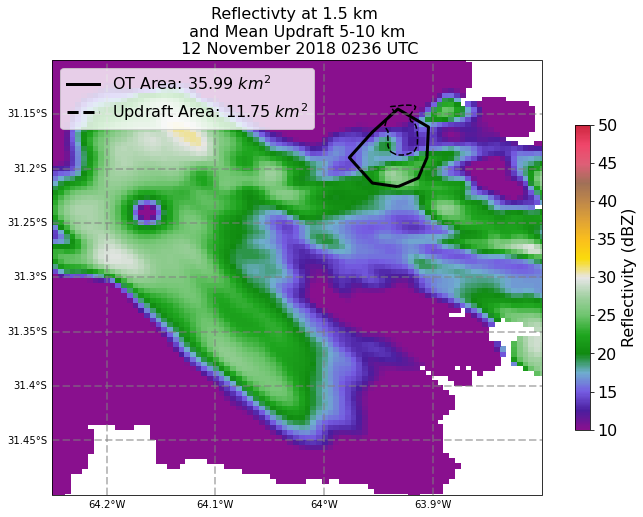

In [225]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
cb1 = plt.colorbar(cf, label='Reflectivity (dBZ)', shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[2,30], colors=['black'], linestyles='dashed')
#plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.25, -63.8, -31.5, -31.1))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=16)
plt.title('Reflectivty at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0236 UTC', fontsize=16)

plt.savefig('summary_figs/Nov_12_2018_2035.png', dpi=400)

In [226]:
#ds = xr.open_dataset('dual_output/Nov12/man_edited_Nov12_0234.nc').squeeze()
ds = xr.open_dataset('dual_output/Nov12/new_cleaning/Nov12_0230.nc').squeeze()

#df_sub = geo_df[df.minute == 34]

In [227]:
lat_min = -31.3
lat_max = -31.1
lon_min = -64
lon_max = -63.9

lats = ds.lat.values
lons = ds.lon.values

w_vals = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w
w = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
w_max = ds.where((ds.w > 0) & (ds.lat > lat_min) & (ds.lat < lat_max) & (ds.lon > lon_min) & (ds.lon < lon_max)).sel(z=slice(5000, 10000)).w.max(dim=['x','y'])
ref = ds.sel(z=3000).ZM_composite.values

area = len(w[np.where(w > 4)]) * .25
areas3, levels = calc_updraft_area(w_vals, 6)
wmax3 = w_max

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


In [228]:
np.nanpercentile(w, 70)

2.537108953669664

Text(0.5, 1.0, 'Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0226 UTC')

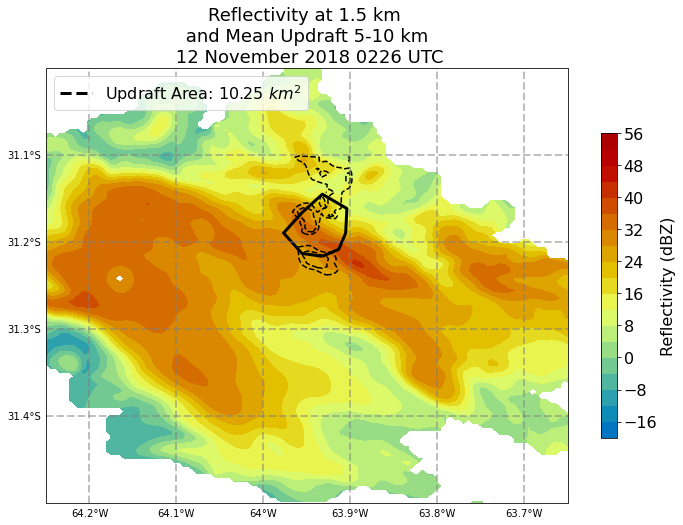

In [229]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.contourf(lons, lats,ref , np.arange(-20, 60, 4), cmap='pyart_HomeyerRainbow')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[2,4, 30], colors=['black'], linestyles='dashed')
#plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.25, -63.65, -31.5, -31.))

#plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=16)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0226 UTC', fontsize=18)

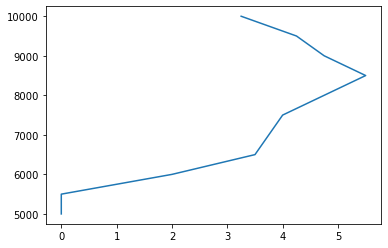

In [180]:
plt.plot(areas3, levels)

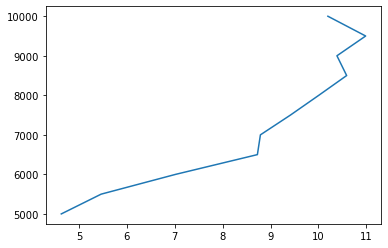

In [181]:
plt.plot(wmax3, levels)

In [65]:
ds = xr.open_dataset('dual_output/Nov12/Nov12_0240.nc').squeeze()

df_sub = geo_df[df.minute == 41]

ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/geopandas/geodataframe.py:828: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [162]:
ota = ot_df.area_circle_polygon.values

ot_lon = df_sub.lon.values[0]
ot_lat = df_sub.lat.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

ot_df = ot_df.translate(shift_x, shift_y)

AttributeError: 'GeoSeries' object has no attribute 'area_circle_polygon'

In [40]:
lats = ds.lat.values
lons = ds.lon.values

# (ds.lat > -31.2) & (ds.lat < -31.13) & (ds.lon > -64.1) & (ds.lon < -63.95)
w = ds.where((ds.w > 0)).sel(z=slice(6000, 10000)).w.mean(dim='z').values

ref = ds.sel(z=1500).ZM_composite.values

ua = len(w[np.where(w > 2)]) * .25

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


Text(0.5, 1.0, 'Reflectivty at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0242 UTC')

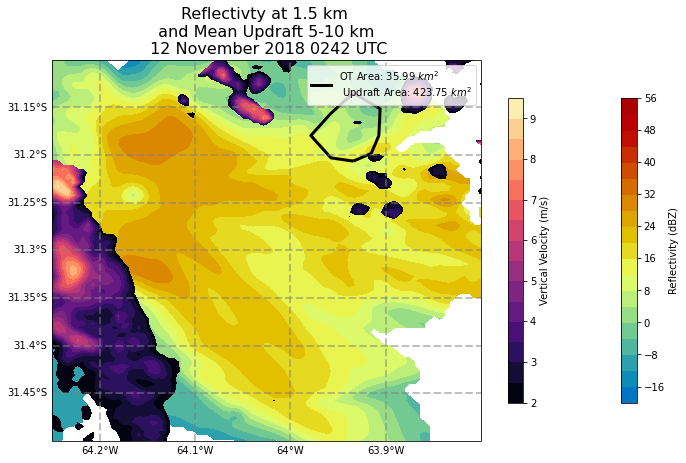

In [41]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.contourf(lons, lats,ref , np.arange(-20, 60, 4), cmap='pyart_HomeyerRainbow')
plt.colorbar(cf, label='Reflectivity (dBZ)', shrink=.7)

cf = plt.contourf(lons, lats,w , np.arange(2, 10, 0.5), cmap='magma')
plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.25, -63.8, -31.5, -31.1))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ \n Updraft Area: {ua} $km^{2}$', linewidth=3)

plt.legend(loc='upper right')

plt.title('Reflectivty at 1.5 km \n and Mean Updraft 5-10 km \n 12 November 2018 0242 UTC', fontsize=16)

#plt.savefig('summary_figs/Nov_12_2018_2034.png', dpi=400)

---
## 10 November 2018 Case

In [10]:
def plot_ot(ot_df_path, dda_ds_path, minute, minlat, maxlat, minlon, maxlon, time='2012', ot_index_val=0,):
    
    # Read in the dataframe
    df = pd.read_csv(ot_df_path, index_col='time', parse_dates=True)
    
    # Read in DDA dataset
    ds = xr.open_dataset(dda_ds_path).squeeze()
    
    # Assign minutes
    df['minute'] = df.index.minute
    
    # Convert geometry
    df['geometry'] = df['geometry'].apply(wkt.loads)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry')
    
    # Subset minute
    df_sub = geo_df[df.minute == minute]
    
    # Read in index val
    ot_df = df_sub[df_sub.lat == df_sub.lat.values[ot_index_val]]
    
    # Extract OTA
    ota = ot_df.area_circle_polygon.values
    
    # Extract Centroid location
    ot_lon = ot_df.centroid.x.values[0]
    ot_lat = ot_df.centroid.y.values[0]
    
    # Shift over OT
    shift_x = ot_df.lon.values[0] - ot_lon
    shift_y = ot_df.lat.values[0] - ot_lat
    ot_df = ot_df.translate(shift_x, shift_y)
    
    # Extract lat and lon values
    lats = ds.lat.values
    lons = ds.lon.values
    
    # Extract updraft velocities
    ds_w = ds.where((ds.w > 0) & (ds.lat > minlat) & (ds.lat < maxlon) & (ds.lon > minlon) & (ds.lon < maxlon)).sel(z=slice(3000, 10000)).w.mean(dim='z').values

    ref = ds.sel(z=1500).ZM_composite.values
    
    w = ds_w
    
    count = len(w[np.where(w > 8)])
    
    updraft_area = count * .25
    
    fig = plt.figure(figsize=(12,8))

    ax = plt.subplot(111, projection=ccrs.PlateCarree())

    cf = plt.contourf(lons, lats,ref , np.arange(-20, 60, 4), cmap='pyart_HomeyerRainbow')
    plt.colorbar(cf, label='Reflectivity (dBZ)', shrink=.7)

    cf = plt.contourf(lons, lats, w , np.arange(8, 20, 0.5), cmap='magma')
    plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

    ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='red',linewidth=3, label='otarea')

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.left_labels= True
    gl.right_labels = False

    ax.set_extent((-64.3, -63.9, -32.2, -31.9))

    plt.plot(0,0, color='red', label=f'OT Area: {ota[0].round(2)} km2 \n Updraft Area: 11 km2', linewidth=3)

    plt.legend(loc='upper right')

    plt.title('Reflectivty at 1.5 km \n and Mean Updraft 3-10 km \n 10 November 2018 2012 UTC', fontsize=16)

    plt.savefig('summary_figs/Nov_10_2018_2012.png', dpi=400)
    
    

In [65]:
df = pd.read_csv('ot_output/Revised_OTs_10_Nov_2007_2024.csv', index_col='time', parse_dates=True)

In [66]:
df['mean_rad'] = np.mean(df[['e_radial', 'se_radial', 's_radial', 'sw_radial', 'w_radial', 'nw_radial', 'n_radial', 'ne_radial']].values * 2, 1)

In [67]:
df['ot_depth'] = df.cloudtop_height - df.tropopause_height

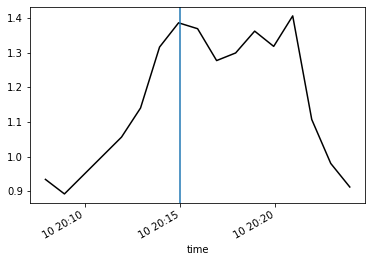

In [68]:
from datetime import datetime
df.ot_depth.plot(color='black')
#df.mintb.plot(color='blue')

plt.axvline(datetime(2018, 11, 10, 20, 15))

In [69]:
df['ot_depth'] = df.cloudtop_height - df.tropopause_height
df[['area_circle_polygon', 'ot_depth', 'mintb']]

,area_circle_polygon,ot_depth,mintb
time,,,
2018-11-10 20:07:55.000000512,76.837805,0.934000,195.819992
2018-11-10 20:08:55.000000512,108.972626,0.892000,196.080002
2018-11-10 20:11:55.000000512,111.806680,1.056000,195.089996
2018-11-10 20:12:55.000000512,110.269330,1.139999,194.509995
2018-11-10 20:13:55.000000512,121.941273,1.316000,193.399994
2018-11-10 20:14:55.000000512,108.745111,1.386000,192.889999
2018-11-10 20:15:55.000000512,95.532540,1.369001,192.989990
2018-11-10 20:16:55.000000512,86.517142,1.277000,193.610001
2018-11-10 20:17:55.000000512,68.686139,1.299000,193.470001


In [70]:
ds = xr.open_dataset('dual_output/Nov10/2014.nc').squeeze()

In [71]:
df['minute'] = df.index.minute + 1

In [72]:
from shapely import wkt

df['geometry'] = df['geometry'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

In [73]:
df_sub = geo_df[df.minute == 13]
ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]
ota = ot_df.area_circle_polygon.values
ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

ot_df = ot_df.translate(shift_x, shift_y)

In [74]:
lats = ds.lat.values
lons = ds.lon.values

In [75]:
w_vals = ds.where((ds.w > 0) & (ds.lat < -31.94) & (ds.lat > -32.05) & (ds.lon < -64.1)).sel(z=slice(3000, 12000)).w
ds_w = ds.where((ds.w > 0) & (ds.lat < -31.94) & (ds.lat > -32.05) & (ds.lon < -64.1)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
ds_wmax = ds.where((ds.w > 0) & (ds.lat < -31.94) & (ds.lat > -32.05) & (ds.lon < -64.1)).sel(z=slice(3000, 12000)).w.max(dim=['x', 'y'])
ref = ds.sel(z=1500).ZM_composite.values

In [76]:
w_max_list = []



w_max_list.append(ds_wmax)

w_area_list = []
areas, levels = calc_updraft_area(w_vals, 4)
w_area_list.append(xr.DataArray(areas, coords={'z':levels,
                  'time':ds_wmax.time}, dims={'z':levels}))

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


In [77]:
w = ds_w

In [78]:
np.nanmax(ds_wmax)

24.65440187145197

In [79]:
count = len(w[np.where(w > 4)]) * .25
w_mean = np.nanmean(w[np.where(w > 4)])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [80]:
w_mean

7.106634866081917

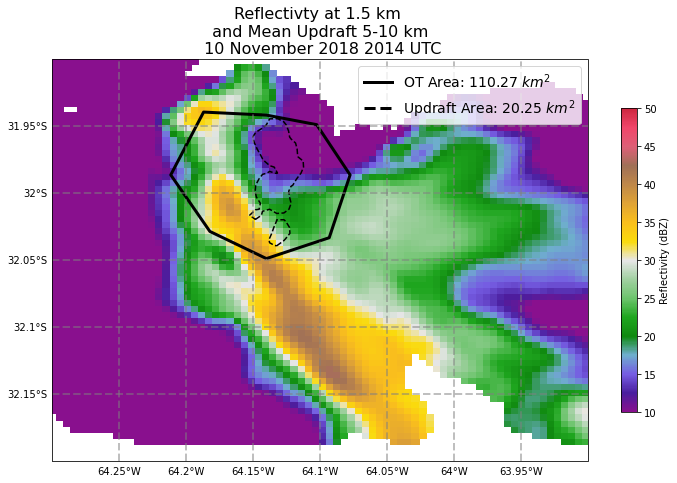

In [81]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
plt.colorbar(cf, label='Reflectivity (dBZ)', shrink=.7)

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[4, 30], colors=['black'], linestyles='dashed')
#plt.colorbar(cf, label='Vertical Velocity (m/s)', shrink=.7)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False

ax.set_extent((-64.3, -63.9, -32.2, -31.9))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {count} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper right', fontsize=14)

plt.title('Reflectivty at 1.5 km \n and Mean Updraft 5-10 km \n 10 November 2018 2014 UTC', fontsize=16)

plt.savefig('summary_figs/Nov_10_2018_2014.png', dpi=400)

## 10 November 2018 2007 UTC

In [82]:
ds = xr.open_dataset('dual_output/Nov10/2007.nc').squeeze()

ot_df = geo_df[df.minute == 8]

ota = ot_df.area_circle_polygon.values

ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

ot_df = ot_df.translate(shift_x, shift_y)

lats = ds.lat.values
lons = ds.lon.values

w_vals = ds.where((ds.w > 0) & ((ds.lon > -64.2) & (ds.lon < -64.1) & (ds.lat >-32.02)& (ds.lat < -31.95))).sel(z=slice(3000, 12000)).w
ds_w = ds.where((ds.w > 0) & ((ds.lon > -64.2) & (ds.lon < -64.1) & (ds.lat >-32.02)& (ds.lat < -31.95))).sel(z=slice(5000, 10000)).w.mean(dim='z').values
ds_wmax = ds.where((ds.w > 0) & (ds.lat > -32.05) & (ds.lon < -64.1)).sel(z=slice(3000, 12000)).w.max(dim=['x','y'])
w_max_list.append(ds_wmax)

areas, levels = calc_updraft_area(w_vals, 4)
w_area_list.append(xr.DataArray(areas, coords={'z':levels,
                  'time':ds_wmax.time}, dims={'z':levels}))

ref = ds.sel(z=1500).ZM_composite.values

print('Max Vel: ', np.nanmax(ds_wmax))

Max Vel:  20.043541295937167


/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


In [83]:
ds_wmax.assign_attrs(updraft_area=[0, 1])

<xarray.DataArray 'w' (z: 19)>
array([ 7.44312289,  6.85908383,  6.86061985,  5.5285899 ,  5.97692763,
        5.67946986,  6.54481647,  9.12689833,  9.48607372, 10.27962929,
       10.12974101, 11.82803872, 11.69841943, 12.78977562, 13.63978675,
       18.3498372 , 20.0435413 , 16.32938832,  2.91017584])
Coordinates:
    time     datetime64[ns] 2018-11-10T20:06:19.075000
  * z        (z) float64 3e+03 3.5e+03 4e+03 ... 1.1e+04 1.15e+04 1.2e+04
Attributes:
    updraft_area:  [0, 1]

In [84]:
areas

array([ 2.5 ,  1.75,  1.75,  0.  ,  0.75,  0.5 ,  1.  ,  2.  ,  1.75,
        3.5 ,  5.5 , 11.25, 10.  ,  9.  ,  8.25,  6.  ,  3.5 ,  1.25,
        0.  ])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


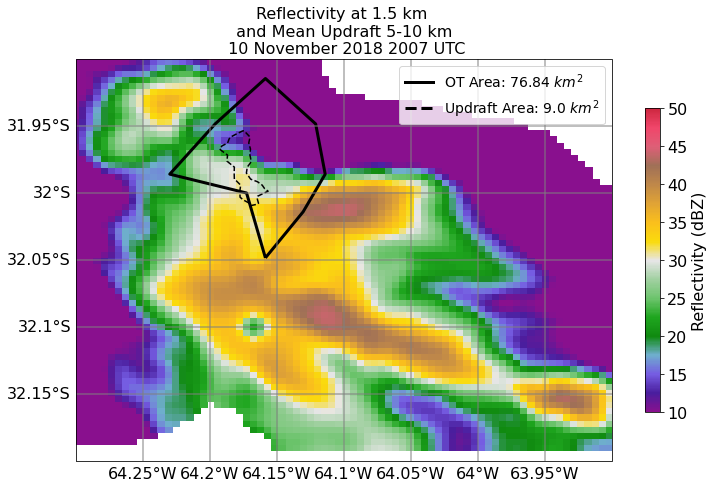

In [85]:
w = ds_w
count = len(w[np.where(w > 4)]) * .25
w_mean = np.nanmean(w[np.where(w > 4)])

fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[4, 40], colors=['black'], linestyles='dashed')
#cb = plt.colorbar(cf, shrink=.7)
#cb.set_label('Vertical Velocity (m/s)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyles='solid')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'color': 'k'}
gl.ylabel_style = {'size': 16, 'color': 'k'}

ax.set_extent((-64.3, -63.9, -32.2, -31.9))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {count} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper right', fontsize=14)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 10 November 2018 2007 UTC', fontsize=16)

plt.savefig('summary_figs/Nov_10_2018_2007.png', dpi=400)

---
## 10 November 2018 2012 UTC

In [86]:
ds = xr.open_dataset('dual_output/Nov10/2012.nc').squeeze()

In [87]:
ot_df = geo_df[geo_df.minute == 12]

In [88]:
ot_df.area_circle_polygon.values[0]

111.80667965395409

In [89]:
df_sub = geo_df[df.minute == 12]
ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]
ota = ot_df.area_circle_polygon.values
ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

ot_df = ot_df.translate(shift_x, shift_y)

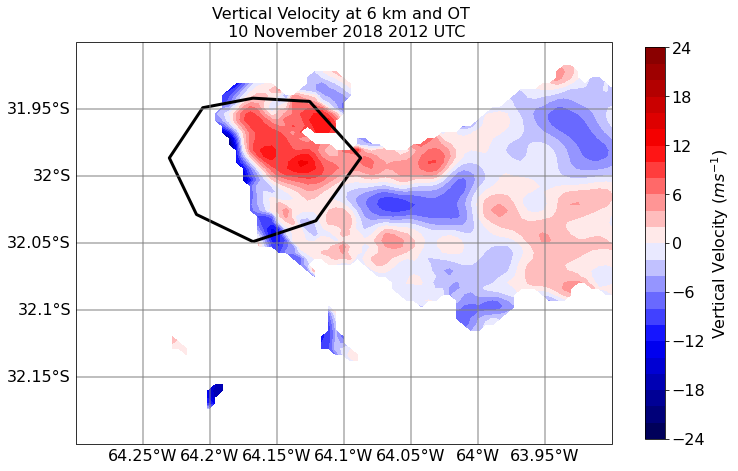

In [90]:
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ds_w = ds.where((ds.w > 0) & (ds.lon < -64.1) & (ds.lat >-32.03)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
w = ds.sel(z=6000).w.values
lons = ds.lon.values
lats = ds.lat.values
lons, lats = np.meshgrid(lons, lats)

#c = plt.contour(lons, lats, w, levels=np.arange(4, 26,20), cmap='seismic')
cf = plt.contourf(lons, lats, w, levels=np.arange(-24, 26,2), cmap='seismic')
cb1 = plt.colorbar(cf, shrink=.9)
cb1.set_label('Vertical Velocity ($ms^{-1}$)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyles='solid')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'color': 'k'}
gl.ylabel_style = {'size': 16, 'color': 'k'}

ax.set_extent((-64.3, -63.9, -32.2, -31.9))

#plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)

#plt.legend(loc='upper right', fontsize=14)

plt.title('Vertical Velocity at 6 km and OT \n 10 November 2018 2012 UTC', fontsize=16)

plt.savefig('summary_figs/Nov_10_2018_2012_w.png', dpi=400)



In [44]:
ds.sel(z=6000).w.plot.contourf(x='lon', y='lat', levels=np.arange(-24, 24, 2))

ValueError: x must be one of None, 'time', 'x', 'y', 'z'

In [91]:
ot_df = geo_df[df.minute == 12]

In [92]:
ota = ot_df.area_circle_polygon.values

In [93]:
ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

In [94]:
shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

In [95]:
ot_df = ot_df.translate(shift_x, shift_y)

In [96]:
lats = ds.lat.values
lons = ds.lon.values

In [97]:
w_vals = ds.where((ds.w > 0) & (ds.lon < -64.1) & (ds.lat >-32.03)).sel(z=slice(3000, 12000)).w
ds_w = ds.where((ds.w > 0) & (ds.lon < -64.1) & (ds.lat >-32.03)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
ds_wmax = ds.where((ds.w > 0) & (ds.lat > -32.05) & (ds.lon < -64.1)).sel(z=slice(3000, 12000)).w.max(dim=['x','y'])
ref = ds.sel(z=1500).ZM_composite.values

In [98]:
w_max_list.append(ds_wmax)

areas, levels = calc_updraft_area(w_vals, 4)
w_area_list.append(xr.DataArray(areas, coords={'z':levels,
                  'time':ds_wmax.time}, dims={'z':levels}))
np.nanmax(ds_wmax)

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


25.525771181621675

In [99]:
w = ds_w

In [100]:
count = len(w[np.where(w > 4)]) * .25
w_mean = np.nanmean(w[np.where(w > 4)])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [101]:
ota

array([111.80667965])

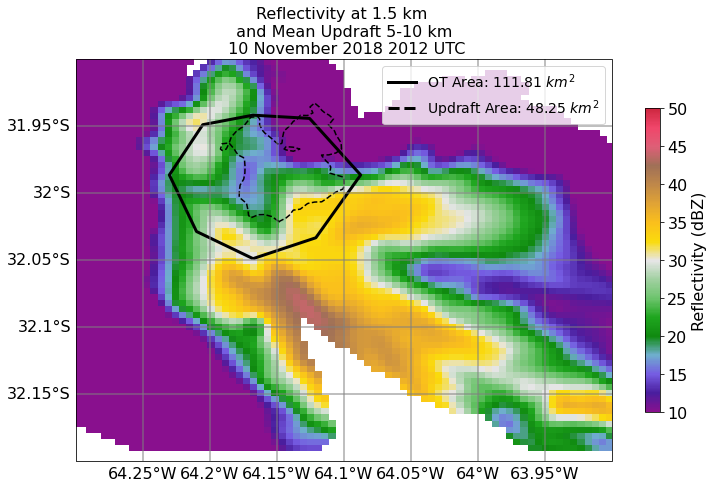

In [102]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[4,40], colors=['black'], linestyles='dashed')
#cb = plt.colorbar(cf, shrink=.7)
#cb.set_label('Vertical Velocity (m/s)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyles='solid')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'color': 'k'}
gl.ylabel_style = {'size': 16, 'color': 'k'}

ax.set_extent((-64.3, -63.9, -32.2, -31.9))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {count} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper right', fontsize=14)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 10 November 2018 2012 UTC', fontsize=16)

plt.savefig('summary_figs/Nov_10_2018_2012.png', dpi=400)

In [103]:
ds_w = ds.where((ds.w > 4) & (ds.lon < -64.1)).sel(z=6000).w.values

In [104]:
w = ds_w[np.where(ds_w > 8)]
rho = .4
a = len(w) * 500 * 500
mass_f = rho * w

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [105]:
len(w) * .25

18.25

In [106]:
np.sum(w) * len(w)* (.25)

13127.455826883453

In [107]:
(np.sum(mass_f) * a)/1e2

52509823.307533816

---
## 10 November 2018 2020 UTC

In [108]:
ds = xr.open_dataset('dual_output/Nov10/2021.nc').squeeze()

In [109]:
ot_df = geo_df[df.minute == 21]

In [110]:
ota = ot_df.area_circle_polygon.values

In [111]:
ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

In [112]:
shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

In [113]:
ot_df = ot_df.translate(shift_x, shift_y)

In [114]:
lats = ds.lat.values
lons = ds.lon.values

In [115]:
w_vals = ds.where((ds.w > 0)& (ds.lat > -32.01) & (ds.lat < -31.95) & (ds.lon > -64.075) & (ds.lon < -64.02)).sel(z=slice(3000, 12000)).w
ds_w = ds.where((ds.w > 0)& (ds.lat > -32.01) & (ds.lat < -31.95) & (ds.lon > -64.075) & (ds.lon < -64.02)).sel(z=slice(3000, 10000)).w.mean(dim='z').values
ds_wmax = ds.where((ds.w > 0) & (ds.lat > -32.05) & (ds.lon < -64.1)).sel(z=slice(3000, 12000)).w.max(dim=['x','y'])
ref = ds.sel(z=1500).ZM_composite.values

In [116]:
w_max_list.append(ds_wmax)

areas, levels = calc_updraft_area(w_vals, 4)
w_area_list.append(xr.DataArray(areas, coords={'z':levels,
                  'time':ds_wmax.time}, dims={'z':levels}))

np.nanmax(ds_wmax)

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


21.391447884993497

In [117]:
ot_df

time
2018-11-10 20:20:55.000000512    POLYGON ((-64.05492 -32.03372, -64.03147 -32.0...
dtype: geometry

In [118]:
w = ds_w

In [119]:
count = len(w[np.where(w > 4)]) * .25
w_mean = np.mean(w[np.where(w > 4)])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [120]:
print(w_mean)

7.4361382325885055


/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


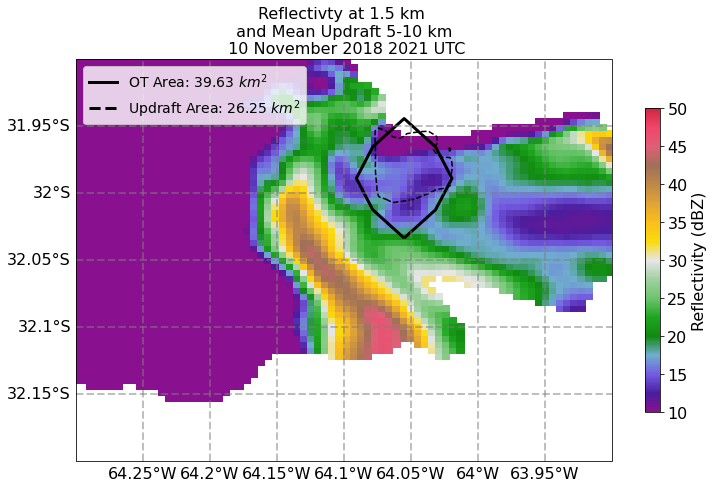

In [121]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[4, 30], colors=['black'], linestyles='--', linewidth=3)
#cb = plt.colorbar(cf, shrink=.7)
#cb.set_label('Vertical Velocity (m/s)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'color': 'k'}
gl.ylabel_style = {'size': 16, 'color': 'k'}

ax.set_extent((-64.3, -63.9, -32.2, -31.9))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {count} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=14)

plt.title('Reflectivty at 1.5 km \n and Mean Updraft 5-10 km \n 10 November 2018 2021 UTC', fontsize=16)

plt.savefig('summary_figs/Nov_10_2018_2020.png', dpi=400)

In [122]:
ds_wmax = xr.concat(w_max_list, 'time')
ds_warea = xr.concat(w_area_list, 'time')

In [123]:
ds_wmax = ds_wmax.sortby('time')
ds_warea = ds_warea.sortby('time')

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an a

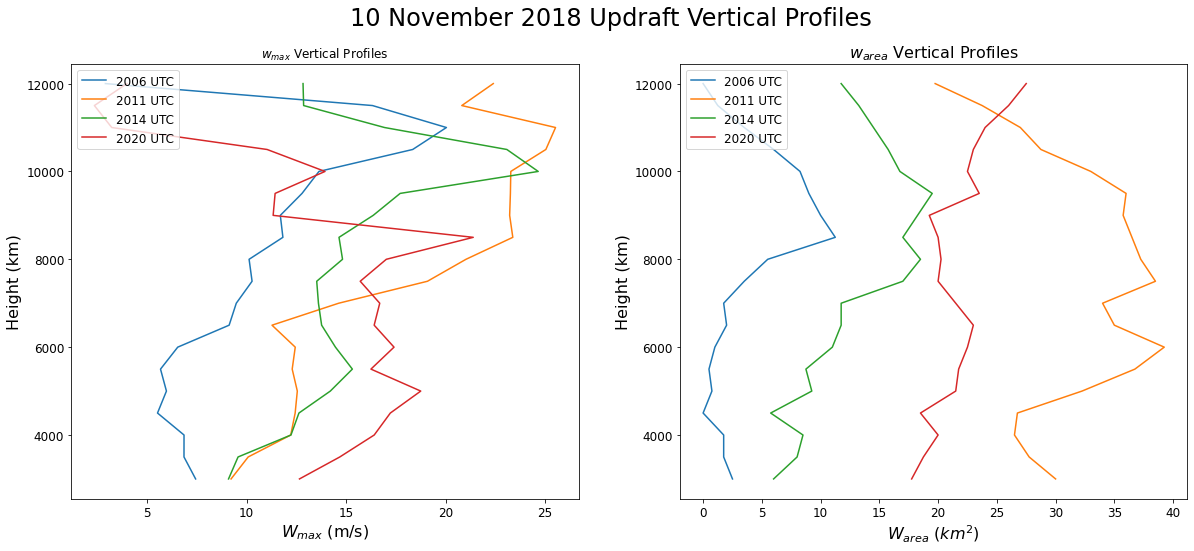

In [124]:
fig = plt.figure(figsize=(20,8))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for time in range(len(ds_wmax.time)):
    ds_w = ds_wmax.isel(time=time)
    ds_wa = ds_warea.isel(time=time)
    mean_w = np.nanmean(ds_w)
    max_w = np.nanmax(ds_w)
    timestamp = int(pd.to_datetime(ds_w.time.values).strftime('%H%M'))
    
    ax = plt.subplot(121)
    ax.plot(ds_w.values, ds_w.z, label=f'{timestamp} UTC', color=colors[time])
    wmax = '$w_{max}$'
    #ax.axvline(mean_w, label=f'Mean {wmax} in 5-10 km layer {np.round(mean_w, 2)} m/s', linestyle=':', color=colors[time])
    #ax.axvline(max_w, label=f'Max {wmax} in 5-10 km layer {np.round(max_w, 2)} m/s', linestyle='--', color=colors[time])
    plt.title('$w_{max}$ Vertical Profiles')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlabel('$W_{max}$ (m/s)', fontsize=16)
    plt.ylabel('Height (km)', fontsize=16)
    
    plt.legend(loc='upper left', fontsize=12)
    
    ax2 = plt.subplot(122)
    ax2.plot(ds_wa.values, ds_wa.z, label=f'{timestamp} UTC', color=colors[time])
    
    plt.title('$w_{area}$ Vertical Profiles', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlabel('$W_{area}$ ($km^2$)', fontsize=16)
    plt.ylabel('Height (km)', fontsize=16)
    
    plt.legend(loc='upper left', fontsize=12)


plt.suptitle('10 November 2018 Updraft Vertical Profiles', fontsize=24)

plt.savefig('Vertical_w_prof_10_nov.png', dpi=400)

In [93]:
geo_df['times'] = pd.to_numeric(geo_df.index.strftime('%H%M')) + 1
geo_df = geo_df[geo_df.times <= 2021]
#geo_df['times'] = pd.to_numeric(geo_df.index.strftime('%H%M')) + 1
trop_temps = geo_df.tropopause_temperature.values
trop_height = geo_df.tropopause_height.values

ct_height = geo_df.cloudtop_height.values
ot_temp = geo_df.mintb.values

btd = ot_temp - trop_temps
depth = ct_height - trop_height

In [94]:
nov10_times = np.array([2007, 2012, 2014, 2021])
nov10_ua = [9., 48.25, 20.75, 26.25]
nov10_wmax = [13.63, 23.37, 24.65, 21.39]

times = geo_df.times

In [95]:
ticks = np.arange(2007, 2022, 1)

In [96]:
times - 1

time
2018-11-10 20:07:55.000000512    2007
2018-11-10 20:08:55.000000512    2008
2018-11-10 20:11:55.000000512    2011
2018-11-10 20:12:55.000000512    2012
2018-11-10 20:13:55.000000512    2013
2018-11-10 20:14:55.000000512    2014
2018-11-10 20:15:55.000000512    2015
2018-11-10 20:16:55.000000512    2016
2018-11-10 20:17:55.000000512    2017
2018-11-10 20:18:55.000000512    2018
2018-11-10 20:19:55.000000512    2019
2018-11-10 20:20:55.000000512    2020
Name: times, dtype: int64

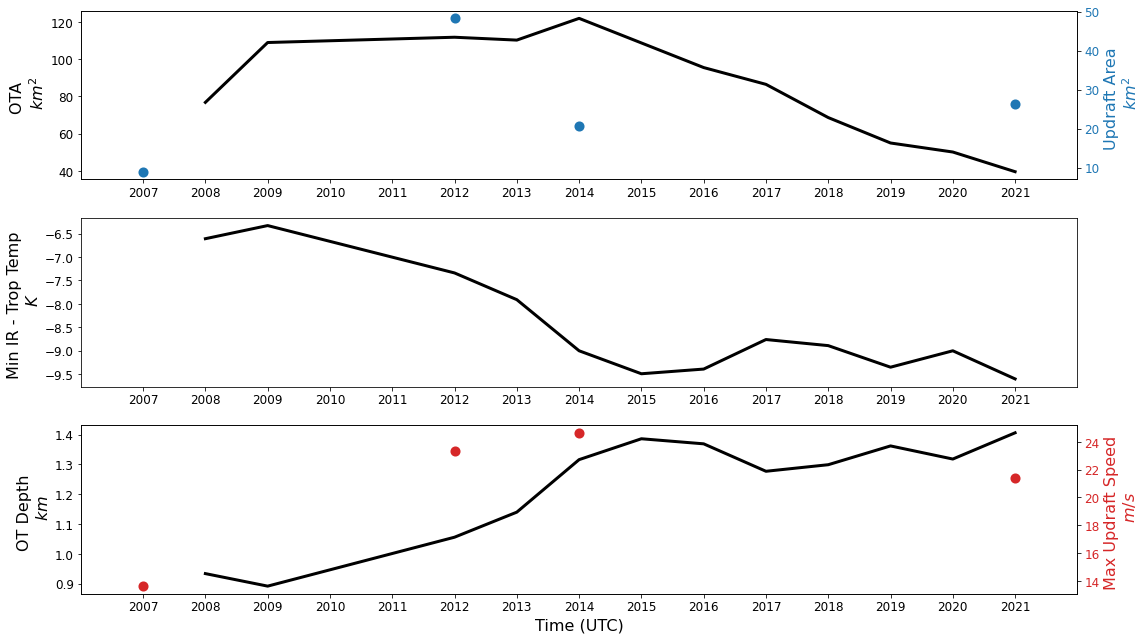

In [97]:
plt.figure(figsize=(16,9))
ax = plt.subplot(311)


ota = geo_df.area_circle_polygon
times = geo_df.times

ax.plot(geo_df.times, ota, linewidth=3, color='black')

max_ota = ota.max()

ind = np.where(ota == max_ota)[0][0]

#plt.axhline(ota[ind], linestyle='--', label=f'Max OTA {round(float(max_ota), 2)} $km^{2}$',
#            color='k', linewidth=3)
#ax.scatter(df_sub.datetime, df_sub.area_polygon, s=80, color='black')
    
plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)

plt.ylabel('OTA \n $km^{2}$', fontsize=16)

ax_1 = plt.twinx()

ax_1.scatter(nov10_times, nov10_ua, linewidth=3, color='tab:blue', linestyle='-', label='Tropopause Height', s=50)

#ax_1.plot(geo_df.times, ota*.4032, linewidth=3, color='tab:blue', linestyle=':')

plt.ylabel('Updraft Area \n $km^{2}$', fontsize=16, color='tab:blue')
plt.xlabel('Time', fontsize=16)

plt.yticks(fontsize=12, color='tab:blue')

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(2006, 2022)

#plt.legend(loc='lower left', fontsize=16)
    
ax2 = plt.subplot(312)
ax2.plot(times, btd, linewidth=3, color='black', linestyle='-', label='BTD')
#ax2.plot(times, ot_temp, linewidth=3, color='blue')

plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)
plt.xlim(2006, 2022)
    
#ax2.scatter(df_sub.datetime, df_sub.mintb, s=80, color='black')
    
plt.ylabel('Min IR - Trop Temp \n $K$', fontsize=16)
    
ax3 = plt.subplot(313)
ax3.plot(times, depth, linewidth=3, color='black', linestyle='-', label='Tropopause Height')

#ax3.plot(times, ct_height, linewidth=3, color='red')
#ax3.scatter(df_sub.datetime, df_sub.cloudtop_height.values[0], s=80, color='black')
    
plt.ylabel('OT Depth \n $km$', fontsize=16)
plt.xlabel('Time (UTC)', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)

ax_3 = ax3.twinx()
ax_3.scatter(nov10_times, nov10_wmax, linewidth=3, color='tab:red', linestyle='-', label='Tropopause Height', s=50)


plt.ylabel('Max Updraft Speed \n $m/s$', fontsize=16, color='tab:red')
plt.xlabel('Time (UTC)', fontsize=16)

plt.yticks(fontsize=12, color='tab:red')
plt.xticks(fontsize=12, color='tab:red')
plt.xlim(2006, 2022)

    
#plt.legend(loc='lower left', fontsize=16)

#ax4 = plt.subplot(514)
#ax4.plot(nov12_times, nov12_ua, linewidth=3, color='tab:blue', linestyle='-', label='Tropopause Height')
#ax3.plot(times, ct_height, linewidth=3, color='red')

#plt.ylabel('Updraft Area \n $km^{2}$', fontsize=16)
#plt.xlabel('Time', fontsize=16)


#ax4 = plt.subplot(515)
#ax4.plot(nov12_times, nov12_wmax, linewidth=3, color='tab:green', linestyle='-', label='Tropopause Height')
#ax3.plot(times, ct_height, linewidth=3, color='red')

#plt.ylabel('Max Updraft Speed \n $m/s$', fontsize=16)
#plt.xlabel('Time', fontsize=16)


#plt.suptitle(f'10 November 2018 Supercell \n {df_sub.datetime.values[0]} UTC', fontsize=24)
    #plt.savefig(f'compare_plots/time_series_{timestamp}.png', dpi=200)
    
#plt.suptitle()

plt.tight_layout()

plt.savefig('10_November_Time_Series.png', dpi=300)
    
plt.show()
plt.close()

In [111]:
import numpy as np
import matplotlib.pyplot as plt
w = np.array([60.75, 21.5, 26.25])
ota = np.array([111.81, 121.94,  42.94])
times = np.array([2012, 2014, 2020])

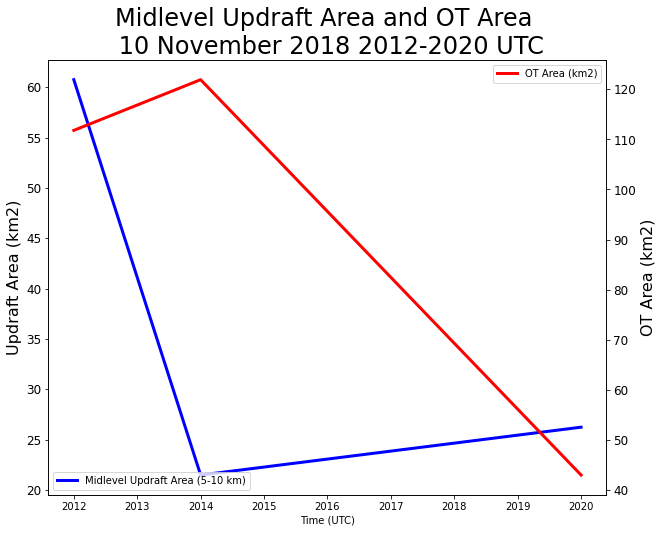

In [234]:
plt.figure(figsize=(10,8))

ax = plt.subplot(111)

ax.plot(times, w, color='blue', linewidth=3, label='Midlevel Updraft Area (5-10 km)')
plt.legend(loc='lower left')
plt.xlabel('Time (UTC)')
plt.ylabel('Updraft Area (km2)', fontsize=16)
plt.yticks(fontsize=12)

ax2 = ax.twinx()
ax2.plot(times, ota, color='red', linewidth=3, label='OT Area (km2)')
plt.xlabel('Time (UTC)', fontsize=16)
plt.ylabel('OT Area (km2)', fontsize=16)
plt.yticks(fontsize=12)

plt.title('Midlevel Updraft Area and OT Area \n 10 November 2018 2012-2020 UTC', fontsize=24)

plt.legend()

In [410]:
nov_10_peak_area = np.max(w)
nov_10_peak_ota = np.max(ota)

In [411]:
print(nov_10_peak_area, nov_10_peak_ota)

60.75 121.94


---
## 13-14 December Case

In [125]:
df= pd.read_csv('ot_output/Revised_OTs_14_Dec_2018_0214_0225.csv', index_col='time', parse_dates=True)

In [126]:
df['ot_depth'] = df.cloudtop_height - df.tropopause_height

In [127]:
ds = xr.open_dataset('dual_output/Dec13_new/Dec13_0217.nc').squeeze()

In [128]:
df['minute'] = df.index.minute

In [129]:
from shapely import wkt

df['geometry'] = df['geometry'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

In [130]:
df_sub = geo_df[df.minute == 16]

In [131]:
ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]

In [132]:
ota = ot_df.area_circle_polygon.values

In [133]:
ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

In [134]:
shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

In [135]:
ot_df = ot_df.translate(shift_x, shift_y)

In [136]:
lats = ds.lat.values
lons = ds.lon.values

In [137]:
w_vals = ds.where((ds.w > 0) & (ds.lat > -31.848) & (ds.lat < -31.75) & (ds.lon > -64.45) & (ds.lon < -64.34)).sel(z=slice(3000, 12000)).w
ds_w = ds.where((ds.w > 0) & (ds.lat > -31.848) & (ds.lat < -31.75) & (ds.lon > -64.45) & (ds.lon < -64.34)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
ds_wmax = ds.where((ds.w > 0) & (ds.lat > -31.848) & (ds.lat < -31.75) & (ds.lon > -64.45) & (ds.lon < -64.34)).sel(z=slice(3000, 12000)).w.max(dim=['x','y'])
ref = ds.where(ds.ZM_composite > -5).sel(z=1500).ZM_composite.values

In [138]:
w_max_list = []
w_area_list = []

areas, levels = calc_updraft_area(w_vals, 9)
w_area_list.append(xr.DataArray(areas, coords={'z':levels,
                  'time':ds_wmax.time}, dims={'z':levels}))

w_max_list.append(ds_wmax)
np.nanmax(ds_wmax)

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


33.699421025179255

In [139]:
w_vals = ds.where((ds.w > 0)).sel(z=slice(5000, 10000)).w.mean(dim='z').fillna(0).values

In [140]:
w = ds_w

In [141]:
updraft_area = len(w[np.where(ds_w > 9)]) * .25
w_mean = np.nanmean(w[np.where(ds_w > 9)])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [142]:
w[np.where(ds_w > 9)]

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([ 9.27682878, 17.35000961, 13.98963072,  9.19823161, 14.65811561,
       13.8433275 , 10.5740579 , 12.56915881, 16.75180319, 20.95796565,
       21.42135826, 17.358596  , 12.92547687,  9.43874279, 10.72486157,
       13.50187222, 20.35497954, 21.1241165 , 19.40954137, 14.52802601,
        9.11925453, 11.56321234, 18.64645158, 18.75561175, 14.52491434,
       11.31667959, 10.17463817, 12.32169494, 12.55943408, 19.21351158,
       21.19138609, 15.26660814, 16.47336712, 19.21252224, 21.21332974,
       21.04318716, 11.27369554, 10.69152069, 13.57239195, 20.3514361 ,
       23.83480757, 23.57636473, 22.59575899, 11.78564587, 13.20858526,
       18.56239851, 20.55815508, 18.28618062, 12.98505501, 12.14690831,
       13.81652015])

In [143]:
w = np.nan_to_num(w)

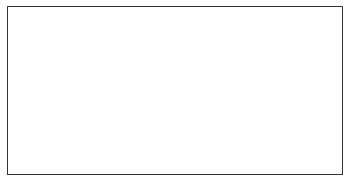

In [144]:
ds_sub = ds.sel(z=1500)

ax = plt.subplot(111, projection=ccrs.PlateCarree())
u_wnd = ds_sub.u.values
v_wnd = ds_sub.v.values
w_wnd = ds_sub.w.values

lons, lats = np.meshgrid(ds.lon.values, ds.lat.values)

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


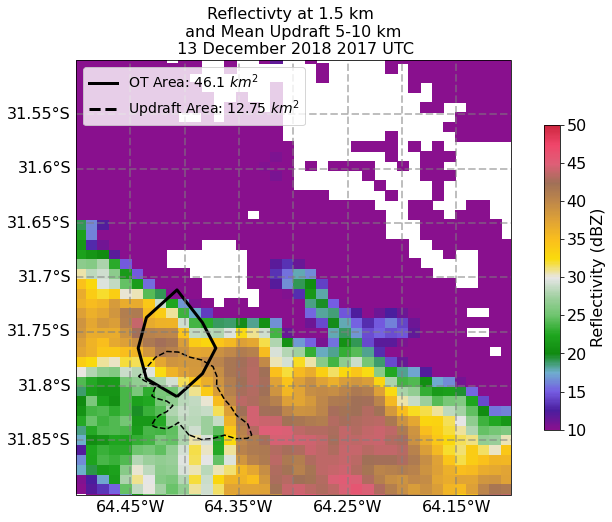

In [145]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
cb1 = plt.colorbar(cf, label='Reflectivity (dBZ)', shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

w_mask = w
cf = plt.contour(lons, lats, w_mask , levels=[9, 30], colors=['black'], linestyles='--', linewidth=3)
#cb = plt.colorbar(cf, shrink=.7)
#cb.set_label('Vertical Velocity (m/s)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'color': 'k'}
gl.ylabel_style = {'size': 16, 'color': 'k'}

ax.set_extent((-64.5, -64.1, -31.9, -31.5))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {updraft_area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=14)

plt.title('Reflectivty at 1.5 km \n and Mean Updraft 5-10 km \n 13 December 2018 2017 UTC', fontsize=16)

plt.savefig('summary_figs/Dec_14_0217.png', dpi=400)

---
## 14 December 2018 2020 UTC 

In [146]:
df= pd.read_csv('ot_output/Revised_OTs_14_Dec_2018_0214_0225.csv', index_col='time', parse_dates=True)

In [147]:
df.area_circle_polygon

time
2018-12-14 02:15:25.000000512    40.137743
2018-12-14 02:16:25.000000512    46.100451
2018-12-14 02:17:25.000000512    39.036624
2018-12-14 02:18:25.000000512    69.240941
2018-12-14 02:19:25.000000512    74.079337
2018-12-14 02:20:25.000000512    67.684649
2018-12-14 02:21:25.000000512    64.809910
2018-12-14 02:22:25.000000512    51.882368
2018-12-14 02:23:25.000000512    56.217753
2018-12-14 02:24:25.000000512    37.921218
2018-12-14 02:25:25.000000512    38.579593
2018-12-14 02:26:25.000000512    48.283925
Name: area_circle_polygon, dtype: float64

In [148]:
ds = xr.open_dataset('dual_output/Dec13/Dec13_0220.nc').squeeze()

In [149]:
df['minute'] = df.index.minute

In [150]:
df_sub = geo_df[df.minute == 21]

In [151]:
ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]

In [152]:
ota = ot_df.area_circle_polygon.values

In [153]:
ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

In [154]:
shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

In [155]:
ot_df = ot_df.translate(shift_x, shift_y)

In [156]:
lats = ds.lat.values
lons = ds.lon.values

In [157]:
w_vals = ds.where((ds.w > 0) & (ds.lat > -31.9) & (ds.lat < -31.75) & (ds.lon > -64.4) & (ds.lon < -64.33)).sel(z=slice(3000, 12000)).w
ds_w = ds.where((ds.w > 0) & (ds.lat > -31.9) & (ds.lat < -31.75) & (ds.lon > -64.4) & (ds.lon < -64.33)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
ds_wmax = ds.where((ds.w > 0) & (ds.lat > -31.9) & (ds.lat < -31.75) & (ds.lon > -64.4) & (ds.lon < -64.33)).sel(z=slice(3000, 12000)).w.max(dim=['x','y'])
ref = ds.where(ds.ZM_composite > -5).sel(z=1500).ZM_composite.values

In [158]:
w_max_list.append(ds_wmax)


areas, levels = calc_updraft_area(w_vals, 9)
w_area_list.append(xr.DataArray(areas, coords={'z':levels,
                  'time':ds_wmax.time}, dims={'z':levels}))
np.nanmax(ds_wmax)

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


26.627381567116956

In [159]:
w_vals = ds.where((ds.w > 0)).sel(z=slice(6000, 10000)).w.mean(dim='z').values

In [160]:
w = ds_w

In [161]:
updraft_area = len(w[np.where(ds_w > 8)]) * .25
w_mean = np.nanmean(w[np.where(ds_w > 8)])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [162]:
print(w_mean)

11.13791089381304


/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


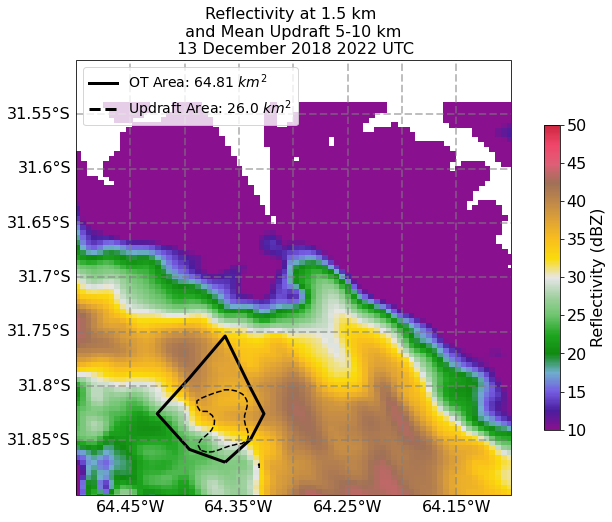

In [163]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
cb1 = plt.colorbar(cf, shrink=.7)
cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

#q = ax.quiver(lons[::2], lats[::2], u_wnd[::2], v_wnd[::2], pivot='mid', color='black', scale=50, scale_units='inches')

#ax.quiverkey(q, X=.95, Y=.1, U=10, label='10 m/s', labelpos='W')

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[9,30], colors=['black'], linestyles='--', linewidth=3)
#cb = plt.colorbar(cf, shrink=.7)
#cb.set_label('Vertical Velocity (m/s)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'color': 'k'}
gl.ylabel_style = {'size': 16, 'color': 'k'}

ax.set_extent((-64.5, -64.1, -31.9, -31.5))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {updraft_area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=14)

plt.title('Reflectivity at 1.5 km \n and Mean Updraft 5-10 km \n 13 December 2018 2022 UTC', fontsize=16)

plt.savefig('summary_figs/Dec_14_0222.png', dpi=400)

In [164]:
#geo_df['times'] = pd.to_numeric(geo_df.index.strftime('%H%M'))

geo_df['times'] = pd.to_numeric(geo_df.index.strftime('%H%M'))
geo_df = geo_df[geo_df.times <= 226]
trop_temps = geo_df.tropopause_temperature.values
trop_height = geo_df.tropopause_height.values

ct_height = geo_df.cloudtop_height.values
ot_temp = geo_df.mintb.values

btd = ot_temp - trop_temps
depth = ct_height - trop_height

In [165]:
dec14_times = np.array([216, 221, 226])
dec14_ua = [38., 26., 16.25]
dec14_wmax = [27.52, 26.03, 25.21]

In [166]:
ticks = np.arange(215, 227, 1)

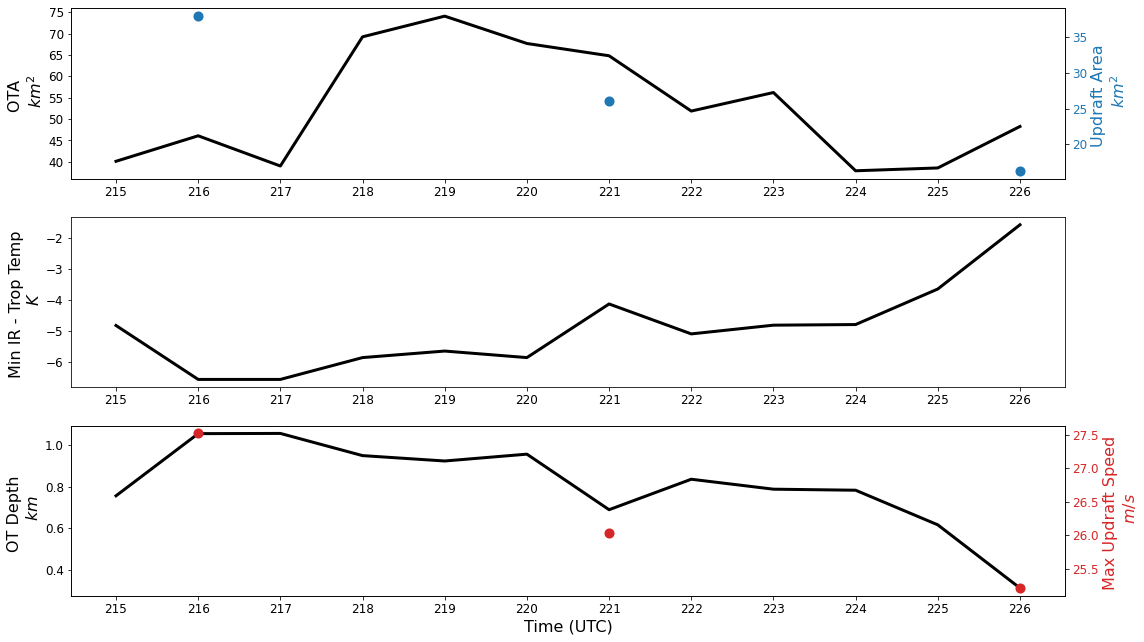

In [167]:
plt.figure(figsize=(16,9))
ax = plt.subplot(311)


ota = geo_df.area_circle_polygon
times = geo_df.times

ax.plot(geo_df.times, ota, linewidth=3, color='black')

max_ota = ota.max()

ind = np.where(ota == max_ota)[0][0]

#plt.axhline(ota[ind], linestyle='--', label=f'Max OTA {round(float(max_ota), 2)} $km^{2}$',
#            color='k', linewidth=3)
#ax.scatter(df_sub.datetime, df_sub.area_polygon, s=80, color='black')
    
plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)

plt.ylabel('OTA \n $km^{2}$', fontsize=16)

ax_1 = plt.twinx()

ax_1.scatter(dec14_times, dec14_ua, linewidth=3, color='tab:blue', linestyle='-', label='Observed Updraft Area', s=50)

#ax_1.plot(geo_df.times, ota*.4032, linewidth=3, color='tab:blue', linestyle=':', label='OTA Derived Updraft Area')

plt.ylabel('Updraft Area \n $km^{2}$', fontsize=16, color='tab:blue')
plt.xlabel('Time', fontsize=16)

plt.yticks(fontsize=12, color='tab:blue')

plt.xticks(fontsize=12)

ax2 = plt.subplot(312)
ax2.plot(geo_df.times, btd, linewidth=3, color='black', linestyle='-', label='BTD')
#ax2.plot(times, ot_temp, linewidth=3, color='blue')

plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)
    
#ax2.scatter(df_sub.datetime, df_sub.mintb, s=80, color='black')
    
plt.ylabel('Min IR - Trop Temp \n $K$', fontsize=16)
    
ax3 = plt.subplot(313)
ax3.plot(geo_df.times, depth, linewidth=3, color='black', linestyle='-', label='Tropopause Height')

#ax3.plot(times, ct_height, linewidth=3, color='red')
#ax3.scatter(df_sub.datetime, df_sub.cloudtop_height.values[0], s=80, color='black')
    
plt.ylabel('OT Depth \n $km$', fontsize=16)
plt.xlabel('Time (UTC)', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(ticks, fontsize=12)

ax_3 = ax3.twinx()
ax_3.scatter(dec14_times, dec14_wmax, linewidth=3, color='tab:red', linestyle='-', label='Tropopause Height', s=50)


plt.ylabel('Max Updraft Speed \n $m/s$', fontsize=16, color='tab:red')
plt.xlabel('Time (UTC)', fontsize=16)

plt.yticks(fontsize=12, color='tab:red')
plt.xticks(fontsize=12, color='tab:red')

    
#plt.legend(loc='lower left', fontsize=16)

#ax4 = plt.subplot(514)
#ax4.plot(nov12_times, nov12_ua, linewidth=3, color='tab:blue', linestyle='-', label='Tropopause Height')
#ax3.plot(times, ct_height, linewidth=3, color='red')

#plt.ylabel('Updraft Area \n $km^{2}$', fontsize=16)
#plt.xlabel('Time', fontsize=16)


#ax4 = plt.subplot(515)
#ax4.plot(nov12_times, nov12_wmax, linewidth=3, color='tab:green', linestyle='-', label='Tropopause Height')
#ax3.plot(times, ct_height, linewidth=3, color='red')

#plt.ylabel('Max Updraft Speed \n $m/s$', fontsize=16)
#plt.xlabel('Time', fontsize=16)


#plt.suptitle(f'10 November 2018 Supercell \n {df_sub.datetime.values[0]} UTC', fontsize=24)
    #plt.savefig(f'compare_plots/time_series_{timestamp}.png', dpi=200)
    
#plt.suptitle()

plt.tight_layout()

plt.savefig('14_December_Time_Series.png', dpi=300)
    
plt.show()
plt.close()

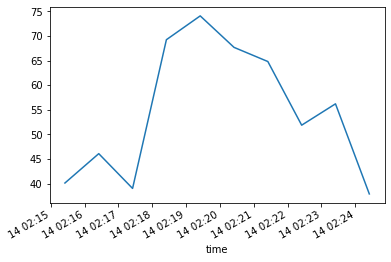

In [168]:
geo_df[geo_df.minute < 25].area_circle_polygon.plot()

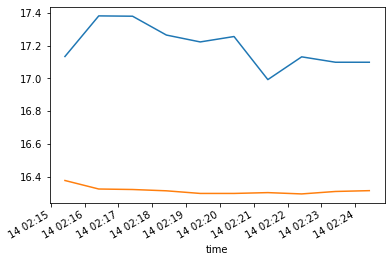

In [169]:
geo_df[geo_df.minute < 25].cloudtop_height.plot()
geo_df[geo_df.minute < 25].tropopause_height.plot()

---
## 14 December 2025 UTC

In [170]:
df= pd.read_csv('ot_output/Revised_OTs_14_Dec_2018_0214_0225.csv', index_col='time', parse_dates=True)

In [171]:
ds = xr.open_dataset('dual_output/Dec14/Dec14_0225.nc').squeeze()

In [172]:
df['minute'] = df.index.minute

In [173]:
df_sub = geo_df[df.minute == 25]

In [174]:
ot_df = df_sub[df_sub.lat == df_sub.lat.values[0]]

In [175]:
ota = ot_df.area_circle_polygon.values

In [176]:
ot_lon = ot_df.centroid.x.values[0]
ot_lat = ot_df.centroid.y.values[0]

In [177]:
shift_x = ot_df.lon_corr.values[0] - ot_lon
shift_y = ot_df.lat_corr.values[0] - ot_lat

In [178]:
ot_df = ot_df.translate(shift_x, shift_y)

In [179]:
lats = ds.lat.values
lons = ds.lon.values

In [180]:
w_vals = ds.where((ds.w > 0) & (ds.lat > -31.935) & (ds.lat < -31.8) & (ds.lon > -64.4) & (ds.lon < -64.18)).sel(z=slice(3000, 12000)).w
ds_w = ds.where((ds.w > 0) & (ds.lat > -31.935) & (ds.lat < -31.8) & (ds.lon > -64.4) & (ds.lon < -64.18)).sel(z=slice(5000, 10000)).w.mean(dim='z').values
ds_wmax = ds.where((ds.w > 0) & (ds.lat > -31.935) & (ds.lat < -31.8) & (ds.lon > -64.4) & (ds.lon < -64.18)).sel(z=slice(3000, 12000)).w.max(dim=['x','y'])
ref = ds.where(ds.ZM_composite > -5).sel(z=1500).ZM_composite.values

In [181]:
w_max_list.append(ds_wmax)
np.nanmax(ds_wmax)

areas, levels = calc_updraft_area(w_vals, 9)
w_area_list.append(xr.DataArray(areas, coords={'z':levels,
                  'time':ds_wmax.time}, dims={'z':levels}))

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


In [182]:
w_vals = ds.where((ds.w > 0)).sel(z=slice(6000, 10000)).w.mean(dim='z').values

In [183]:
w = ds_w

In [184]:
updraft_area = len(w[np.where(ds_w > 9)]) * .25

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [185]:
w_mean = np.nanmean(w[np.where(ds_w > 9)])

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [186]:
w_mean

12.867797103604888

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


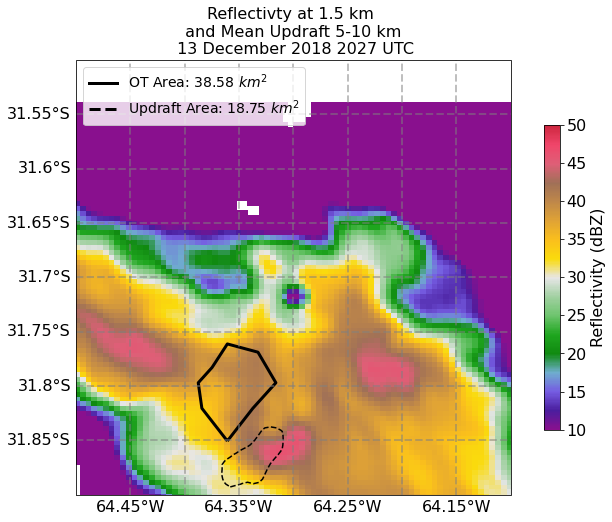

In [187]:
fig = plt.figure(figsize=(12,8))

ax = plt.subplot(111, projection=ccrs.PlateCarree())

cf = plt.pcolormesh(lons, lats,ref , vmin=10, vmax=50, cmap='pyart_Carbone17')
cb1 = plt.colorbar(cf, label='Reflectivity (dBZ)', shrink=.7)

cb1.set_label('Reflectivity (dBZ)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

w_mask = np.nan_to_num(w)
cf = plt.contour(lons, lats, w_mask , levels=[9,30], colors=['black'], linestyles='--', linewidth=3)
#cb = plt.colorbar(cf, shrink=.7)
#cb.set_label('Vertical Velocity (m/s)', fontsize=16)
cb1.ax.tick_params(labelsize=16)

ot_df.plot(ax=ax, facecolor="none", 
              edgecolor='black',linewidth=3, label='otarea')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels= True
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'color': 'k'}
gl.ylabel_style = {'size': 16, 'color': 'k'}

ax.set_extent((-64.5, -64.1, -31.9, -31.5))

plt.plot(0,0, color='black', label=f'OT Area: {ota[0].round(2)} $km^{2}$ ', linewidth=3)
plt.plot(0,0, color='black', label=f'Updraft Area: {updraft_area} $km^{2}$', linewidth=3, linestyle='--')

plt.legend(loc='upper left', fontsize=14)

plt.title('Reflectivty at 1.5 km \n and Mean Updraft 5-10 km \n 13 December 2018 2027 UTC', fontsize=16)

plt.savefig('summary_figs/Dec_14_0227.png', dpi=400)

In [188]:
w = np.array([8.25, 6, 6])
ota = np.array([40.14, 67.68,  38.58])
times = np.array([2015, 2020, 2025])

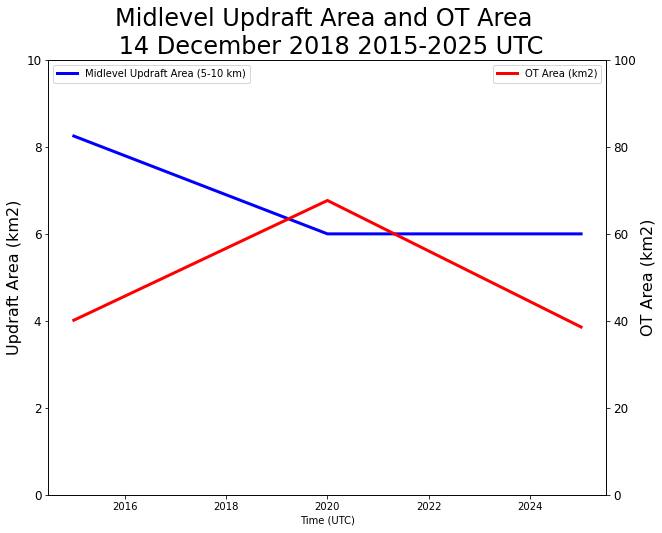

In [189]:
plt.figure(figsize=(10,8))

ax = plt.subplot(111)

ax.plot(times, w, color='blue', linewidth=3, label='Midlevel Updraft Area (5-10 km)')
plt.legend(loc='upper left')
plt.xlabel('Time (UTC)')
plt.ylabel('Updraft Area (km2)', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0,10)

ax2 = ax.twinx()
ax2.plot(times, ota, color='red', linewidth=3, label='OT Area (km2)')
plt.xlabel('Time (UTC)', fontsize=16)
plt.ylabel('OT Area (km2)', fontsize=16)
plt.yticks(fontsize=12)

plt.title('Midlevel Updraft Area and OT Area \n 14 December 2018 2015-2025 UTC', fontsize=24)

plt.ylim(0,100)

plt.legend()

In [1178]:
dec_14_peak_area = np.max(w)
dec_14_peak_ota = np.max(ota)

In [1179]:
dec_14_peak_area

8.25

In [1180]:
dec_14_peak_ota

67.68

In [1181]:
ds_wmax = xr.concat(w_max_list, 'time')
ds_warea = xr.concat(w_area_list, 'time')

In [1182]:
from datetime import timedelta

/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/mgrover/miniconda3/envs/unidata/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an a

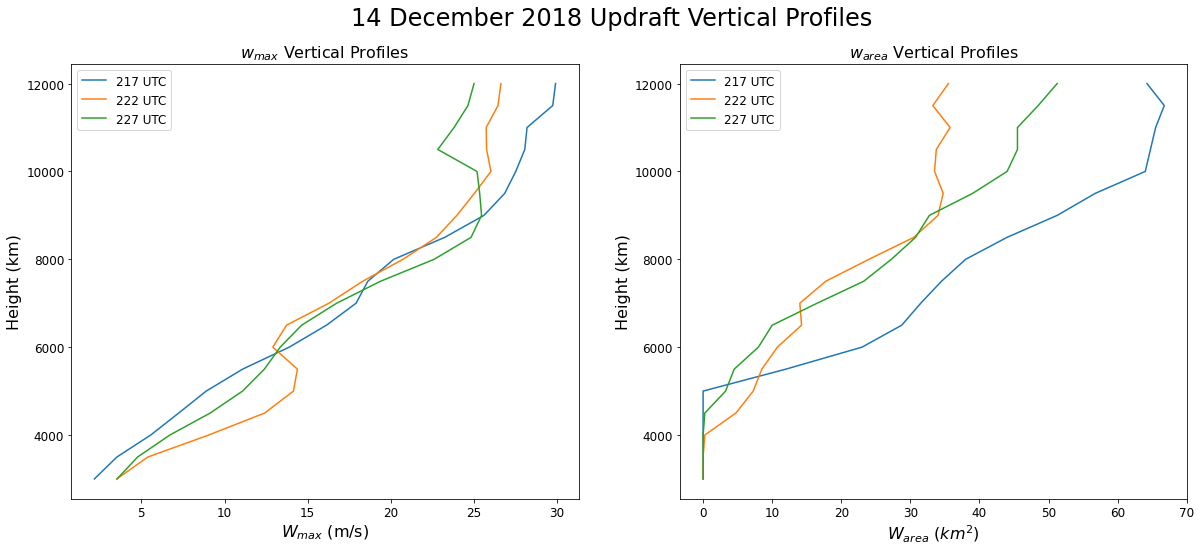

In [1183]:
fig = plt.figure(figsize=(20,8))

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for time in range(len(ds_wmax.time)):
    ds_w = ds_wmax.isel(time=time)
    ds_wa = ds_warea.isel(time=time)
    mean_w = np.nanmean(ds_w)
    max_w = np.nanmax(ds_w)
    timestamp = int((pd.to_datetime(ds_w.time.values) + timedelta(minutes=2)).strftime('%H%M'))
    
    ax = plt.subplot(121)
    ax.plot(ds_w.values, ds_w.z, label=f'{timestamp} UTC', color=colors[time])
    wmax = '$w_{max}$'
    #ax.axvline(mean_w, label=f'Mean {wmax} in 5-10 km layer {np.round(mean_w, 2)} m/s', linestyle=':', color=colors[time])
    #ax.axvline(max_w, label=f'Max {wmax} in 5-10 km layer {np.round(max_w, 2)} m/s', linestyle='--', color=colors[time])
    plt.title('$w_{max}$ Vertical Profiles', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlabel('$W_{max}$ (m/s)', fontsize=16)
    plt.ylabel('Height (km)', fontsize=16)
    
    plt.legend(loc='upper left', fontsize=12)
    
    ax2 = plt.subplot(122)
    ax2.plot(ds_wa.values, ds_wa.z, label=f'{timestamp} UTC', color=colors[time])
    
    plt.title('$w_{area}$ Vertical Profiles', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlabel('$W_{area}$ ($km^2$)', fontsize=16)
    plt.ylabel('Height (km)', fontsize=16)
    
    plt.legend(loc='upper left', fontsize=12)



plt.suptitle('14 December 2018 Updraft Vertical Profiles', fontsize=24)

plt.savefig('Vertical_w_prof_14_dec.png', dpi=400)